In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def mean_std_filling(column_name):    
    mean = column_name.mean()
    std = column_name.std()
    is_null = column_name.isna().sum()
    print('Mean:', round(mean,3), 'Std:', round(std,3), 'Null:', is_null)

    # Elimizdeki dizinin aritmetik ortalama ve standart sapma değerlerini kullanarak rastgele float veriler üretme
    rand_float = np.random.uniform(mean - std, mean + std, size = is_null)
    print('Numbers:', rand_float[:10])

    # Oluşturduğumuz sayılarla boş değerlerimizi doldurma
    column_name[pd.isnull(column_name)] = rand_float
    column_name = column_name.astype(float)

In [3]:
df = pd.read_csv('/Users/hasanenesguray/Desktop/Bootcamp/Projects/2. Project/zingat_final.csv')
df.head()

,Unnamed: 0,listing_names,listing_prices,location,netm2,bedroom_number,building_floor_number,floor,heating_system,age,situation,seller,title_dead_status,credit,rent_income
0,0,Kadiköy Moda Sarraf Ali Sokak'ta Eşyalı Satılı...,2750000,Caferağa,55.0,21.0,6.0,6,Kalorifer (Doğalgaz),36-40,Boş,Danışman,NaN,Hayır,30000.0
1,1,KADIKÖY BAHARİYE CADDESİNE 50 METRE MESAFEDE 7...,4750000,Caferağa,60.0,1.0,4.0,Zemin Kat,Klima,16-20,Kiracılı,Danışman,Kat Mülkiyeti,Evet,NaN
2,2,ANA CADDE ÜZERİNDE KİRACILI 100 M2 DÜKKAN,4750000,Caferağa,85.0,2.0,5.0,Zemin Kat,Merkezi Sistem,11-15,Kiracılı,Danışman,Kat Mülkiyeti,Evet,NaN
3,3,KADIKÖY ÇARŞISININ HAREKETLİ YERİNDE 300 M2 DÜ...,15000000,Caferağa,255.0,3.0,4.0,Zemin Kat,Kombi (Doğalgaz),16-20,Kiracılı,Danışman,Kat Mülkiyeti,Evet,NaN
4,4,KADIKÖY MODA DA OTOPARKLI YENİ BİNADA FERAH 13...,9750000,Caferağa,100.0,31.0,4.0,Yüksek Giriş,Kombi (Doğalgaz),6-10,Mülk,NaN,NaN,Evet,0.0


In [4]:
df.columns

Index(['Unnamed: 0', 'listing_names', 'listing_prices', 'location', 'netm2',
       'bedroom_number', 'building_floor_number', 'floor', 'heating_system',
       'age', 'situation', 'seller', 'title_dead_status', 'credit',
       'rent_income'],
      dtype='object')

In [5]:
df.replace(np.nan,None,inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1844 entries, 0 to 1843
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Unnamed: 0             1844 non-null   int64 
 1   listing_names          1844 non-null   object
 2   listing_prices         1844 non-null   int64 
 3   location               1844 non-null   object
 4   netm2                  1712 non-null   object
 5   bedroom_number         1679 non-null   object
 6   building_floor_number  1713 non-null   object
 7   floor                  1647 non-null   object
 8   heating_system         1747 non-null   object
 9   age                    1736 non-null   object
 10  situation              1655 non-null   object
 11  seller                 870 non-null    object
 12  title_dead_status      931 non-null    object
 13  credit                 1826 non-null   object
 14  rent_income            1308 non-null   object
dtypes: int64(2), object(1

In [7]:
#Checking listing_prices column

df.listing_prices.unique()

array([  2750000,   4750000,  15000000,   9750000,  11950000,   2475000,
         6400000,   3250000,   3050000,  55000000,   4000000,   4250000,
        14000000,   3150000,   4300000,   4800000,  40000000,  28000000,
        35000000,   3500000,  30000000,   4500000,   6750000,  10000000,
         8500000,  18500000,   5000000,   5500000,  12500000,  25000000,
         7500000,  90000000,   3750000,   7000000,   2950000,  27500000,
        17500000,  22500000,   9500000,    650000,  51275000, 150000000,
         8400000,   5800000,   1750000,   7200000,  45000000,   6500000,
         6450000,    660000,   6800000,  23500000,   6000000,   7250000,
         5200000,   3600000,   1500000,    600000,   1800000,   3000000,
         4150000, 115000000,  14500000,  23000000,   5750000,   3100000,
        11750000,    990000,   3850000,  18750000,   1250000,   8000000,
        20000000,  12000000,   3800000,  89000000,   9000000,  70000000,
        24500000,   3450000,    850000,  10750000, 

In [8]:
#Checking location column

df.location.unique()

array(['Caferağa', 'Osmanağa', 'Rasimpaşa', 'Koşuyolu', 'Dumlupınar',
       'Fikirtepe', 'Eğitim', 'Feneryolu', 'Zühtüpaşa', 'Fenerbahçe',
       'Caddebostan', 'Göztepe', 'Merdivenköy', 'Sahrayı', '19',
       'Erenköy', 'Suadiye', 'Kozyatağı', 'Bostancı', 'Acıbadem',
       'Hasanpaşa'], dtype=object)

In [9]:
#Adjusting the location column

df.location.replace('19','19 Mayıs',inplace=True)
df.location.unique()

array(['Caferağa', 'Osmanağa', 'Rasimpaşa', 'Koşuyolu', 'Dumlupınar',
       'Fikirtepe', 'Eğitim', 'Feneryolu', 'Zühtüpaşa', 'Fenerbahçe',
       'Caddebostan', 'Göztepe', 'Merdivenköy', 'Sahrayı', '19 Mayıs',
       'Erenköy', 'Suadiye', 'Kozyatağı', 'Bostancı', 'Acıbadem',
       'Hasanpaşa'], dtype=object)

In [10]:
#Checking the netm2 column

df.netm2.unique()

array([55.0, 60.0, 85.0, 255.0, 100.0, 110.0, None, 200.0, 50.0, 90.0,
       13.0, 160.0, 70.0, 638.0, 51.0, 170.0, 107.0, 26.0, 77.0, 213.0,
       43.0, 68.0, 187.0, 340.0, 765.0, 120.0, 75.0, 467.0, 136.0, 272.0,
       153.0, 31.0, 94.0, 102.0, 22.0, 124.0, 115.0, 56.0, 78.0, 140.0,
       680.0, 150.0, 25.0, 119.0, 238.0, 66.0, 53.0, 24.0, 65.0, 425.0,
       76.0, 17.0, 16.0, 111.0, 141.0, 128.0, 161.0, 64.0, 34.0, 1160.0,
       500.0, 80.0, 935.0, 130.0, 204.0, 640.0, 240.0, 540.0, 190.0,
       210.0, 420.0, 350.0, 260.0, 400.0, 144.0, 122.0, 155.0, 45.0,
       256.0, 88.0, 40.0, 62.0, 92.0, 137.0, 67.0, 96.0, 47.0, 38.0, 98.0,
       58.0, 101.0, 87.0, 192.0, 28.0, 30.0, 135.0, 173.0, 125.0, 145.0,
       383.0, 95.0, 175.0, 86.0, 117.0, 105.0, 93.0, 148.0, 205.0, 114.0,
       54.0, 185.0, 73.0, 3.0, 280.0, 1143.0, 168.0, 237.0, 220.0, 180.0,
       138.0, 74.0, 310.0, 720.0, 357.0, 281.0, 121.0, 277.0, 72.0, 197.0,
       142.0, 230.0, 133.0, 330.0, 195.0, 149.0, 103.0, 1

In [11]:
#Fillng the null values of the netm2 column statistically

mean_std_filling(df['netm2'])
df.info()

Mean: 129.152 Std: 110.404 Null: 132
Numbers: [155.68548917  55.99822509  55.75754948  73.58395153 145.64803343
  46.11368437 195.64282945  91.26786254 129.01770013  90.21990834]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1844 entries, 0 to 1843
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Unnamed: 0             1844 non-null   int64 
 1   listing_names          1844 non-null   object
 2   listing_prices         1844 non-null   int64 
 3   location               1844 non-null   object
 4   netm2                  1844 non-null   object
 5   bedroom_number         1679 non-null   object
 6   building_floor_number  1713 non-null   object
 7   floor                  1647 non-null   object
 8   heating_system         1747 non-null   object
 9   age                    1736 non-null   object
 10  situation              1655 non-null   object
 11  seller                 870 non-null    object


/var/folders/_k/_rt6thqx6mj63rxtq_q_l7j00000gn/T/ipykernel_75275/2609805245.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  column_name[pd.isnull(column_name)] = rand_float


In [12]:
#Converting the column type to float
df = df.astype({"netm2": float})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1844 entries, 0 to 1843
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             1844 non-null   int64  
 1   listing_names          1844 non-null   object 
 2   listing_prices         1844 non-null   int64  
 3   location               1844 non-null   object 
 4   netm2                  1844 non-null   float64
 5   bedroom_number         1679 non-null   object 
 6   building_floor_number  1713 non-null   object 
 7   floor                  1647 non-null   object 
 8   heating_system         1747 non-null   object 
 9   age                    1736 non-null   object 
 10  situation              1655 non-null   object 
 11  seller                 870 non-null    object 
 12  title_dead_status      931 non-null    object 
 13  credit                 1826 non-null   object 
 14  rent_income            1308 non-null   object 
dtypes: f

In [13]:
#Checking the bedroom_number column

df.bedroom_number.unique()

array([21.0, 1.0, 2.0, 3.0, 31.0, 41.0, 11.0, None, 4.0, 22.0, 10.0, 6.0,
       5.0, 42.0, 61.0, 71.0, 32.0, 51.0, 52.0, 73.0, 44.0, 62.0, 72.0],
      dtype=object)

In [14]:
#Adjusting the bedroom_number column

df.bedroom_number.replace([21.,31.,41.,11.,22.,10.,42.,61.,71.,32.,51.,52.,73.,44.,62.,72.],
                         [2.,3.,4.,1.,2.,1.,4.,6.,7.,3.,5.,5.,7.,4.,6.,7.], inplace = True)

df.replace(np.nan,None,inplace=True)

df.bedroom_number.unique()

array([2.0, 1.0, 3.0, 4.0, None, 6.0, 5.0, 7.0], dtype=object)

In [15]:
#Fillng the null values of the bedroom_number column statistically
mean_std_filling(df['bedroom_number'])
df.info()

Mean: 2.825 Std: 1.004 Null: 165
Numbers: [2.43518088 2.08254369 3.12245253 2.21613849 2.67419721 2.04375023
 3.30876426 2.50841642 1.90619101 3.12989509]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1844 entries, 0 to 1843
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             1844 non-null   int64  
 1   listing_names          1844 non-null   object 
 2   listing_prices         1844 non-null   int64  
 3   location               1844 non-null   object 
 4   netm2                  1844 non-null   float64
 5   bedroom_number         1844 non-null   object 
 6   building_floor_number  1713 non-null   object 
 7   floor                  1647 non-null   object 
 8   heating_system         1747 non-null   object 
 9   age                    1736 non-null   object 
 10  situation              1655 non-null   object 
 11  seller                 870 non-null    object 
 12  title

/var/folders/_k/_rt6thqx6mj63rxtq_q_l7j00000gn/T/ipykernel_75275/2609805245.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  column_name[pd.isnull(column_name)] = rand_float


In [16]:
#Converting the column type to float
df = df.astype({"bedroom_number": float})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1844 entries, 0 to 1843
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             1844 non-null   int64  
 1   listing_names          1844 non-null   object 
 2   listing_prices         1844 non-null   int64  
 3   location               1844 non-null   object 
 4   netm2                  1844 non-null   float64
 5   bedroom_number         1844 non-null   float64
 6   building_floor_number  1713 non-null   object 
 7   floor                  1647 non-null   object 
 8   heating_system         1747 non-null   object 
 9   age                    1736 non-null   object 
 10  situation              1655 non-null   object 
 11  seller                 870 non-null    object 
 12  title_dead_status      931 non-null    object 
 13  credit                 1826 non-null   object 
 14  rent_income            1308 non-null   object 
dtypes: f

In [17]:
#Checking the building_floor_number column

df.building_floor_number.unique()

array([6.0, 4.0, 5.0, 8.0, 3.0, 7.0, None, 1.0, 1020.0, 2.0, 20.0, 9.0,
       10.0], dtype=object)

In [18]:
#Adjusting the building_floor_number column

df.building_floor_number.replace(1020.,15,inplace=True)
df.replace(np.nan,None,inplace=True)
df.building_floor_number.unique()

array([6.0, 4.0, 5.0, 8.0, 3.0, 7.0, None, 1.0, 15.0, 2.0, 20.0, 9.0,
       10.0], dtype=object)

In [19]:
#Fillng the null values of the building_floor_number column statistically
mean_std_filling(df['building_floor_number'])
df.info()

Mean: 8.894 Std: 4.642 Null: 131
Numbers: [ 4.74380021  8.36658432  8.73901521  7.466185    9.18585104  7.1090721
 12.51779832  6.91494539 12.1745227   4.86571075]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1844 entries, 0 to 1843
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             1844 non-null   int64  
 1   listing_names          1844 non-null   object 
 2   listing_prices         1844 non-null   int64  
 3   location               1844 non-null   object 
 4   netm2                  1844 non-null   float64
 5   bedroom_number         1844 non-null   float64
 6   building_floor_number  1844 non-null   object 
 7   floor                  1647 non-null   object 
 8   heating_system         1747 non-null   object 
 9   age                    1736 non-null   object 
 10  situation              1655 non-null   object 
 11  seller                 870 non-null    object 
 

/var/folders/_k/_rt6thqx6mj63rxtq_q_l7j00000gn/T/ipykernel_75275/2609805245.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  column_name[pd.isnull(column_name)] = rand_float


In [20]:
#Converting the column type to float
df = df.astype({"building_floor_number": float})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1844 entries, 0 to 1843
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             1844 non-null   int64  
 1   listing_names          1844 non-null   object 
 2   listing_prices         1844 non-null   int64  
 3   location               1844 non-null   object 
 4   netm2                  1844 non-null   float64
 5   bedroom_number         1844 non-null   float64
 6   building_floor_number  1844 non-null   float64
 7   floor                  1647 non-null   object 
 8   heating_system         1747 non-null   object 
 9   age                    1736 non-null   object 
 10  situation              1655 non-null   object 
 11  seller                 870 non-null    object 
 12  title_dead_status      931 non-null    object 
 13  credit                 1826 non-null   object 
 14  rent_income            1308 non-null   object 
dtypes: f

In [21]:
#Checking the floor column

df.floor.unique()

array(['6', 'Zemin Kat', 'Yüksek Giriş', '4', '3', '1', 'Bahçe katı',
       'Bodrum Kat', None, '2', 'Giriş Katı', 'Kot 1', '5',
       'Garden Floor', 'Kot 3', 'Çatı Katı', 'Müstakil', 'Komple', '12',
       '7', '13', '20 ve üzeri', '11', '14', '10', '19', '18', '17', '16',
       '8', '9', '15', 'Kot 2', 'Kot 4'], dtype=object)

In [22]:
#Adjusting the floor column

df.floor.replace(['Zemin Kat','Yüksek Giriş','Bahçe katı','Bodrum Kat','Giriş Katı','Kot 1','Garden Floor','Kot 3','20 ve üzeri','Kot 2','Kot 4'],
                [0,0,0,-1,0,-1,0,-3,25,-2,-4], inplace = True)

conditions = [
    (df['floor'] == 'Müstakil'),
    (df['floor'] == 'Komple')]
values = [1, 1]
df['private_house'] = np.select(conditions, values)

df.floor.replace(['Komple','Müstakil','6','4','3','1','2','5','12','7',
                  '13','11','14','10','19','18','17','16','8','9','15'],
                [None,None,6,4,3,1,2,5,12,7,13,11,14,10,19,18,17,16,8,9,15], inplace = True)

df['floor'] = df.apply(lambda x: x['building_floor_number'] if x['floor'] == 'Çatı Katı' else x['floor'], axis=1)

df.floor.unique()


array([ 6.,  0.,  4.,  3.,  1., -1., nan,  2.,  5., -3., 12.,  7., 13.,
       25., 11., 14., 10., 19., 18., 17., 16.,  8.,  9., 15., -2., -4.])

In [23]:
#Fillng the null values of the floor column statistically

mean_std_filling(df['floor'])
df.info()

Mean: 4.236 Std: 4.275 Null: 207
Numbers: [8.19567406 5.1382767  4.54914312 1.42238272 1.64783329 2.82714928
 3.59580512 4.6905786  2.61360865 2.77340998]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1844 entries, 0 to 1843
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             1844 non-null   int64  
 1   listing_names          1844 non-null   object 
 2   listing_prices         1844 non-null   int64  
 3   location               1844 non-null   object 
 4   netm2                  1844 non-null   float64
 5   bedroom_number         1844 non-null   float64
 6   building_floor_number  1844 non-null   float64
 7   floor                  1844 non-null   float64
 8   heating_system         1747 non-null   object 
 9   age                    1736 non-null   object 
 10  situation              1655 non-null   object 
 11  seller                 870 non-null    object 
 12  title

/var/folders/_k/_rt6thqx6mj63rxtq_q_l7j00000gn/T/ipykernel_75275/2609805245.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  column_name[pd.isnull(column_name)] = rand_float


In [24]:
#Converting the column type to float
df = df.astype({"floor": float})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1844 entries, 0 to 1843
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             1844 non-null   int64  
 1   listing_names          1844 non-null   object 
 2   listing_prices         1844 non-null   int64  
 3   location               1844 non-null   object 
 4   netm2                  1844 non-null   float64
 5   bedroom_number         1844 non-null   float64
 6   building_floor_number  1844 non-null   float64
 7   floor                  1844 non-null   float64
 8   heating_system         1747 non-null   object 
 9   age                    1736 non-null   object 
 10  situation              1655 non-null   object 
 11  seller                 870 non-null    object 
 12  title_dead_status      931 non-null    object 
 13  credit                 1826 non-null   object 
 14  rent_income            1308 non-null   object 
 15  priv

In [25]:
#Checkig the heating_system column

df.heating_system.unique()

array(['Kalorifer (Doğalgaz)', 'Klima', 'Merkezi Sistem',
       'Kombi (Doğalgaz)', None, 'Merkezi Sistem (Isı Payı Ölçer)',
       'Kombi (Elektrikli)', 'Yok', 'Combi Boiler (Natural Gas)',
       'Fancoil', 'Yerden Isıtma', 'Soba (Kömür)', 'Güneş Enerjisi',
       'Air Conditioner', 'None'], dtype=object)

In [26]:
#Adjusting the heating_system column

df.heating_system.replace('Kalorifer (Doğalgaz)','Natural Gas',inplace=True)
df.heating_system.replace('Klima','Air Conditioner',inplace=True)
df.heating_system.replace('Merkezi Sistem','Central System',inplace=True)
df.heating_system.replace('Kombi (Doğalgaz)','Natural Gas',inplace=True)
df.heating_system.replace('Merkezi Sistem (Isı Payı Ölçer)','Central System',inplace=True)
df.heating_system.replace('Kombi (Elektrikli)','Electric',inplace=True)
df.heating_system.replace('Combi Boiler (Natural Gas)','Natural Gas',inplace=True)
df.heating_system.replace('Yerden Isıtma','Underfloor Heating',inplace=True)
df.heating_system.replace('Soba (Kömür)','Stove',inplace=True)
df.heating_system.replace('Güneş Enerjisi','Solar Energy',inplace=True)
df.heating_system.replace('None',None,inplace=True)
df.heating_system.replace('Yok',None,inplace=True)
df.heating_system.unique()

array(['Natural Gas', 'Air Conditioner', 'Central System', None,
       'Electric', 'Fancoil', 'Underfloor Heating', 'Stove',
       'Solar Energy'], dtype=object)

In [27]:
#Checking the age column

df.age.unique()

array(['36-40', '16-20', '11-15', '6-10', '31-35', '21-25', '26-30', '2',
       '40', '4', None, '0', '1', 'Between', '3', '5'], dtype=object)

In [28]:
#Adjusting the age column

df['age'] = df.apply(lambda x: '31-35' if x['Unnamed: 0'] == 106 else x['age'], axis=1)
df['age'] = df.apply(lambda x: '36-40' if x['Unnamed: 0'] == 314 else x['age'], axis=1)
df.replace('0','0-5',inplace=True)
df.replace('1','0-5',inplace=True)
df.replace('2','0-5',inplace=True)
df.replace('3','0-5',inplace=True)
df.replace('4','0-5',inplace=True)
df.replace('5','0-5',inplace=True)
df.replace('40','36-40',inplace=True)

df.age.replace(['0-5','6-10','11-15','16-20','21-25','26-30','31-35','36-40','6-10'],
                         [8,7,6,5,4,3,2,1,0], inplace = True)

df.age.unique()

array([ 1.,  5.,  6.,  7.,  2.,  4.,  3.,  8., nan])

In [29]:
#Fillng the null values of the floor column statistically

mean_std_filling(df['age'])
df.info()

Mean: 5.467 Std: 2.508 Null: 108
Numbers: [7.70939236 7.67951486 5.47862018 7.54306302 6.39072043 4.43012652
 7.51064288 5.43294019 7.74372431 7.63016259]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1844 entries, 0 to 1843
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             1844 non-null   int64  
 1   listing_names          1844 non-null   object 
 2   listing_prices         1844 non-null   int64  
 3   location               1844 non-null   object 
 4   netm2                  1844 non-null   float64
 5   bedroom_number         1844 non-null   float64
 6   building_floor_number  1844 non-null   float64
 7   floor                  1844 non-null   float64
 8   heating_system         1735 non-null   object 
 9   age                    1844 non-null   float64
 10  situation              1655 non-null   object 
 11  seller                 870 non-null    object 
 12  title

In [30]:
#Checking the situation column
df.situation.unique()

array(['Boş', 'Kiracılı', 'Mülk', None, 'Occupied', 'Vacant'],
      dtype=object)

In [31]:
#Adjusting the column
df.situation.replace('Boş','Vacant',inplace =True)
df.situation.replace('Kiracılı','Occupied',inplace =True)
df.situation.fillna('Vacant',inplace=True)
df.situation.replace('Mülk','Vacant',inplace =True)
df.situation.unique()


array(['Vacant', 'Occupied'], dtype=object)

In [32]:
#Checking the seller column
df.seller.unique()

array(['Danışman', None, 'İnşaat', 'Agent'], dtype=object)

In [33]:
#Adjusting the column

df.seller.replace('Danışman','Agent',inplace =True)
df.seller.replace('İnşaat','Construction',inplace =True)
df.seller.fillna('From Owner',inplace=True)
df.seller.unique()

array(['Agent', 'From Owner', 'Construction'], dtype=object)

In [34]:
#Checking the title_dead_status column
df.title_dead_status.unique()

array([None, 'Kat Mülkiyeti', 'Arsa Tapulu', 'Müstakil Parsel',
       'Kat İrtifakı', 'Hisseli Tapu', 'Construction Servitude',
       'İskanı Alınmış', 'Bilinmiyor'], dtype=object)

In [35]:
#Dropping the column due to the excess of unknown values
df.drop('title_dead_status', inplace=True, axis=1)

In [36]:
#Checing the credit column
df.credit.unique()

array(['Hayır', 'Evet', None, 'Yes'], dtype=object)

In [37]:
#Adjusting the credti column
df.credit.replace('Hayır',0,inplace =True)
df.credit.replace('Evet',1,inplace =True)
df.credit.replace('Yes',1,inplace =True)

df.credit.unique()

array([ 0.,  1., nan])

In [38]:
#Fillng the null values of the floor column statistically

mean_std_filling(df['credit'])
df.info()

Mean: 0.927 Std: 0.26 Null: 18
Numbers: [0.8456334  0.72561171 1.12814798 1.18030835 1.03711251 1.16616549
 1.14041094 1.14824404 1.10709556 1.07772262]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1844 entries, 0 to 1843
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             1844 non-null   int64  
 1   listing_names          1844 non-null   object 
 2   listing_prices         1844 non-null   int64  
 3   location               1844 non-null   object 
 4   netm2                  1844 non-null   float64
 5   bedroom_number         1844 non-null   float64
 6   building_floor_number  1844 non-null   float64
 7   floor                  1844 non-null   float64
 8   heating_system         1735 non-null   object 
 9   age                    1844 non-null   float64
 10  situation              1844 non-null   object 
 11  seller                 1844 non-null   object 
 12  credit 

In [39]:
#Checking the rent_income column
df.rent_income.unique()

array([3.00e+04,      nan, 0.00e+00, 2.00e+04, 8.00e+03, 1.30e+04,
       1.50e+04, 1.00e+04, 3.50e+03, 1.20e+04, 3.30e+04, 2.10e+04,
       4.90e+03, 5.50e+03, 1.40e+04, 7.50e+03, 9.50e+03, 8.50e+03,
       1.00e+00, 2.50e+04, 1.70e+04, 6.00e+03, 1.80e+04, 4.00e+04,
       6.00e+04, 4.50e+04, 5.00e+04, 2.20e+04, 6.50e+03, 1.25e+04,
       7.20e+04, 7.00e+03, 9.00e+03, 4.50e+03, 3.50e+04, 1.60e+04,
       2.30e+04, 2.75e+04, 3.00e+03, 5.00e+01, 2.50e+02])

In [40]:
#Dropping the column due to the excess of 0 values
df.drop('rent_income', inplace=True, axis=1)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1844 entries, 0 to 1843
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             1844 non-null   int64  
 1   listing_names          1844 non-null   object 
 2   listing_prices         1844 non-null   int64  
 3   location               1844 non-null   object 
 4   netm2                  1844 non-null   float64
 5   bedroom_number         1844 non-null   float64
 6   building_floor_number  1844 non-null   float64
 7   floor                  1844 non-null   float64
 8   heating_system         1735 non-null   object 
 9   age                    1844 non-null   float64
 10  situation              1844 non-null   object 
 11  seller                 1844 non-null   object 
 12  credit                 1844 non-null   float64
 13  private_house          1844 non-null   int64  
dtypes: float64(6), int64(3), object(5)
memory usage: 201.8+ 

In [42]:
#Drop the null values
df.dropna(inplace=True)

#Drop the unnecessary columns
df.drop('Unnamed: 0', inplace=True, axis=1)
df.drop('listing_names', inplace=True, axis=1)
df.drop_duplicates(inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1687 entries, 0 to 1843
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   listing_prices         1687 non-null   int64  
 1   location               1687 non-null   object 
 2   netm2                  1687 non-null   float64
 3   bedroom_number         1687 non-null   float64
 4   building_floor_number  1687 non-null   float64
 5   floor                  1687 non-null   float64
 6   heating_system         1687 non-null   object 
 7   age                    1687 non-null   float64
 8   situation              1687 non-null   object 
 9   seller                 1687 non-null   object 
 10  credit                 1687 non-null   float64
 11  private_house          1687 non-null   int64  
dtypes: float64(6), int64(2), object(4)
memory usage: 171.3+ KB


In [43]:
df.location.value_counts()

Suadiye        267
Göztepe        187
Caddebostan    178
Erenköy        164
Fenerbahçe     162
Bostancı       109
Feneryolu      109
Osmanağa        72
Kozyatağı       60
Caferağa        59
19 Mayıs        50
Acıbadem        38
Merdivenköy     35
Sahrayı         33
Fikirtepe       30
Zühtüpaşa       27
Koşuyolu        26
Hasanpaşa       25
Rasimpaşa       20
Eğitim          19
Dumlupınar      17
Name: location, dtype: int64

In [44]:
df.heating_system.value_counts()

Natural Gas           732
Central System        619
Air Conditioner       294
Underfloor Heating     32
Fancoil                 4
Electric                3
Stove                   2
Solar Energy            1
Name: heating_system, dtype: int64

In [45]:
df.heating_system.replace('Underfloor Heating','Others',inplace=True)
df.heating_system.replace('Electric','Others',inplace=True)
df.heating_system.replace('Fancoil','Others',inplace=True)
df.heating_system.replace('Stove','Others',inplace=True)
df.heating_system.replace('Solar Energy','Others',inplace=True)
df.heating_system.value_counts()

Natural Gas        732
Central System     619
Air Conditioner    294
Others              42
Name: heating_system, dtype: int64

In [46]:
df.situation.value_counts()

Vacant      1061
Occupied     626
Name: situation, dtype: int64

In [47]:
df.seller.value_counts()

From Owner      865
Agent           817
Construction      5
Name: seller, dtype: int64

In [48]:
df = pd.get_dummies(df, columns=['location', 'heating_system', 'situation',
                                      'seller'], drop_first=True)

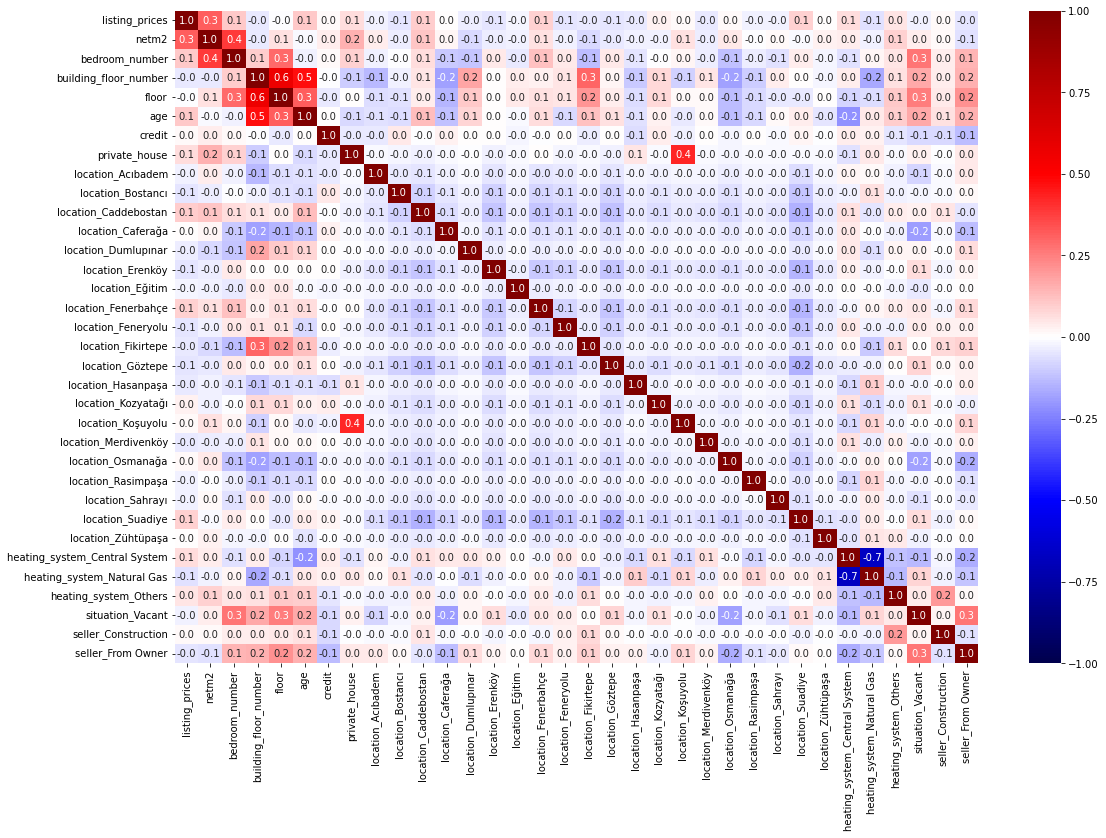

In [49]:
plt.figure(figsize=[18,12])
sns.heatmap(df.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1, fmt='.1f');

In [50]:
y = df.listing_prices
X = df.drop(columns=["listing_prices"],axis=1)

lr_model = LinearRegression()
lr_model.fit(X, y)
R2_score = lr_model.score(X, y)
print(R2_score)

import statsmodels.api as sm

lm1 = sm.OLS(y,X)

# Modeli Eğitme
fit1 = lm1.fit()

# Oluşturduğumuz modele ilişkin özet tablosunu görüntüleme
fit1.summary()

0.15774334392699352


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:         listing_prices   R-squared (uncentered):                   0.346
Model:                            OLS   Adj. R-squared (uncentered):              0.333
Method:                 Least Squares   F-statistic:                              26.47
Date:                Thu, 24 Nov 2022   Prob (F-statistic):                   1.39e-127
Time:                        12:49:31   Log-Likelihood:                         -30766.
No. Observations:                1687   AIC:                                  6.160e+04
Df Residuals:                    1654   BIC:                                  6.178e+04
Df Model:                          33                                                  
Covariance Type:            nonrobust                                                  
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
netm2                          7.514e+04   6754.022     11.125      0.000    6.19e+04    8.84e+04
bedroom_number                  2.02e+05   5.97e+05      0.338      0.735   -9.69e+05    1.37e+06
building_floor_number         -6.002e+05   1.53e+05     -3.933      0.000      -9e+05   -3.01e+05
floor                         -1.642e+04   1.55e+05     -0.106      0.915    -3.2e+05    2.87e+05
age                            1.525e+06    2.4e+05      6.351      0.000    1.05e+06       2e+06
credit                        -1.612e+06   1.85e+06     -0.871      0.384   -5.24e+06    2.02e+06
private_house                  1.154e+07   7.29e+06      1.583      0.114   -2.76e+06    2.58e+07
location_Acıbadem             -5.477e+06   3.93e+06     -1.393      0.164   -1.32e+07    2.24e+06
location_Bostancı             -1.382e+06   2.92e+06     -0.473      0.636   -7.11e+06    4.35e+06
location_Caddebostan           4.132e+06   2.74e+06      1.510      0.131   -1.23e+06     9.5e+06
location_Caferağa             -6.882e+05   3.34e+06     -0.206      0.837   -7.24e+06    5.86e+06
location_Dumlupınar           -4.187e+05   5.57e+06     -0.075      0.940   -1.13e+07    1.05e+07
location_Erenköy              -1.245e+06    2.7e+06     -0.460      0.645   -6.55e+06    4.06e+06
location_Eğitim               -7.794e+05    5.1e+06     -0.153      0.879   -1.08e+07    9.23e+06
location_Fenerbahçe            5.977e+06   2.79e+06      2.145      0.032    5.11e+05    1.14e+07
location_Feneryolu            -7.775e+05   2.93e+06     -0.266      0.790   -6.52e+06    4.96e+06
location_Fikirtepe             1.071e+06   4.56e+06      0.235      0.814   -7.87e+06       1e+07
location_Göztepe              -1.088e+06   2.64e+06     -0.413      0.680   -6.26e+06    4.08e+06
location_Hasanpaşa            -4.919e+06   4.56e+06     -1.079      0.281   -1.39e+07    4.02e+06
location_Kozyatağı             5.239e+06   3.44e+06      1.524      0.128    -1.5e+06     1.2e+07
location_Koşuyolu             -2.037e+06   4.97e+06     -0.410      0.682   -1.18e+07     7.7e+06
location_Merdivenköy          -4.168e+06   4.11e+06     -1.013      0.311   -1.22e+07     3.9e+06
location_Osmanağa             -1.901e+04   3.09e+06     -0.006      0.995   -6.08e+06    6.04e+06
location_Rasimpaşa            -1.877e+06   4.98e+06     -0.377      0.706   -1.16e+07    7.88e+06
location_Sahrayı              -2.613e+06   4.13e+06     -0.632      0.527   -1.07e+07    5.49e+06
location_Suadiye                6.19e+06   2.52e+06      2.454      0.014    1.24e+06    1.11e+07
location_Zühtüpaşa             1.884e+06   4.45e+06      0.423      0.672   -6.85e+06    1.06e+07
heating_system_Central System  3.246e+06   1

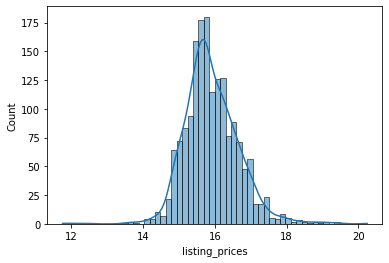

In [51]:
df['listing_prices'] = np.log(df['listing_prices'])
sns.histplot(data = df['listing_prices'], kde=True);

In [52]:
y = df.listing_prices
X = df.drop(columns=["listing_prices"],axis=1)

lr_model = LinearRegression()
lr_model.fit(X, y)
R2_score = lr_model.score(X, y)
print(R2_score)

import statsmodels.api as sm

lm1 = sm.OLS(y,X)

# Modeli Eğitme
fit1 = lm1.fit()

# Oluşturduğumuz modele ilişkin özet tablosunu görüntüleme
fit1.summary()

0.5303563045781475


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:         listing_prices   R-squared (uncentered):                   0.988
Model:                            OLS   Adj. R-squared (uncentered):              0.988
Method:                 Least Squares   F-statistic:                              4147.
Date:                Thu, 24 Nov 2022   Prob (F-statistic):                        0.00
Time:                        12:52:13   Log-Likelihood:                         -3328.9
No. Observations:                1687   AIC:                                      6724.
Df Residuals:                    1654   BIC:                                      6903.
Df Model:                          33                                                  
Covariance Type:            nonrobust                                                  
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
netm2                             0.0039      0.001      6.685      0.000       0.003       0.005
bedroom_number                    0.7071      0.052     13.704      0.000       0.606       0.808
building_floor_number             0.0801      0.013      6.073      0.000       0.054       0.106
floor                            -0.0470      0.013     -3.517      0.000      -0.073      -0.021
age                               0.2463      0.021     11.872      0.000       0.206       0.287
credit                            3.1172      0.160     19.493      0.000       2.804       3.431
private_house                     0.6788      0.630      1.078      0.281      -0.557       1.914
location_Acıbadem                 6.9710      0.340     20.510      0.000       6.304       7.638
location_Bostancı                 6.5379      0.252     25.903      0.000       6.043       7.033
location_Caddebostan              6.8674      0.236     29.050      0.000       6.404       7.331
location_Caferağa                 7.7611      0.289     26.894      0.000       7.195       8.327
location_Dumlupınar               5.8973      0.481     12.256      0.000       4.954       6.841
location_Erenköy                  6.5689      0.234     28.120      0.000       6.111       7.027
location_Eğitim                   6.8196      0.441     15.460      0.000       5.954       7.685
location_Fenerbahçe               6.7495      0.241     28.022      0.000       6.277       7.222
location_Feneryolu                6.5221      0.253     25.793      0.000       6.026       7.018
location_Fikirtepe                6.4158      0.394     16.291      0.000       5.643       7.188
location_Göztepe                  6.6886      0.228     29.347      0.000       6.242       7.136
location_Hasanpaşa                7.0581      0.394     17.923      0.000       6.286       7.831
location_Kozyatağı                6.3995      0.297     21.537      0.000       5.817       6.982
location_Koşuyolu                 7.1307      0.429     16.613      0.000       6.289       7.973
location_Merdivenköy              5.9266      0.356     16.667      0.000       5.229       6.624
location_Osmanağa                 7.9812      0.267     29.903      0.000       7.458       8.505
location_Rasimpaşa                7.3814      0.430     17.163      0.000       6.538       8.225
location_Sahrayı                  6.6737      0.357     18.687      0.000       5.973       7.374
location_Suadiye                  6.8814      0.218     31.567      0.000       6.454       7.309
location_Zühtüpaşa                7.0244      0.385     18.262      0.000       6.270       7.779
heating_system_Central System     1.9728    

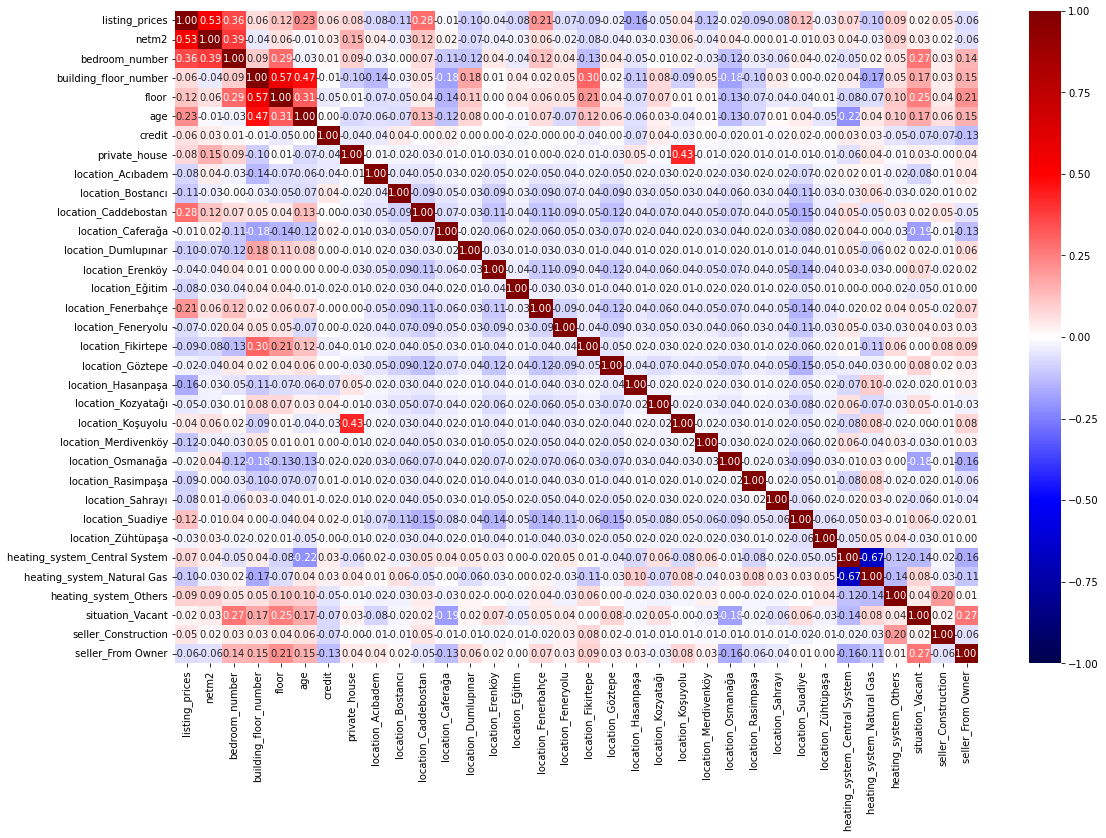

In [53]:
plt.figure(figsize=[18,12])
sns.heatmap(df.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1, fmt='.2f');

In [54]:
df2 = df.drop(columns=["private_house","seller_Construction"],axis=1)

In [55]:
y = df2.listing_prices
X = df2.drop(columns=["listing_prices"],axis=1)

lr_model = LinearRegression()
lr_model.fit(X, y)
R2_score = lr_model.score(X, y)
print(R2_score)

import statsmodels.api as sm

lm1 = sm.OLS(y,X)

# Modeli Eğitme
fit1 = lm1.fit()

# Oluşturduğumuz modele ilişkin özet tablosunu görüntüleme
fit1.summary()

0.5297485294654315


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:         listing_prices   R-squared (uncentered):                   0.988
Model:                            OLS   Adj. R-squared (uncentered):              0.988
Method:                 Least Squares   F-statistic:                              4414.
Date:                Thu, 24 Nov 2022   Prob (F-statistic):                        0.00
Time:                        20:01:29   Log-Likelihood:                         -3330.1
No. Observations:                1687   AIC:                                      6722.
Df Residuals:                    1656   BIC:                                      6890.
Df Model:                          31                                                  
Covariance Type:            nonrobust                                                  
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
netm2                             0.0040      0.001      6.861      0.000       0.003       0.005
bedroom_number                    0.7117      0.052     13.816      0.000       0.611       0.813
building_floor_number             0.0792      0.013      6.013      0.000       0.053       0.105
floor                            -0.0468      0.013     -3.504      0.000      -0.073      -0.021
age                               0.2464      0.021     11.900      0.000       0.206       0.287
credit                            3.1001      0.159     19.442      0.000       2.787       3.413
location_Acıbadem                 6.9754      0.340     20.523      0.000       6.309       7.642
location_Bostancı                 6.5459      0.252     25.938      0.000       6.051       7.041
location_Caddebostan              6.8792      0.236     29.120      0.000       6.416       7.343
location_Caferağa                 7.7663      0.289     26.912      0.000       7.200       8.332
location_Dumlupınar               5.9192      0.481     12.307      0.000       4.976       6.863
location_Erenköy                  6.5746      0.234     28.146      0.000       6.116       7.033
location_Eğitim                   6.8310      0.441     15.486      0.000       5.966       7.696
location_Fenerbahçe               6.7566      0.241     28.056      0.000       6.284       7.229
location_Feneryolu                6.5377      0.253     25.881      0.000       6.042       7.033
location_Fikirtepe                6.4630      0.393     16.465      0.000       5.693       7.233
location_Göztepe                  6.6986      0.228     29.402      0.000       6.252       7.146
location_Hasanpaşa                7.0916      0.393     18.047      0.000       6.321       7.862
location_Kozyatağı                6.4083      0.297     21.569      0.000       5.826       6.991
location_Koşuyolu                 7.3160      0.396     18.477      0.000       6.539       8.093
location_Merdivenköy              5.9363      0.356     16.697      0.000       5.239       6.634
location_Osmanağa                 7.9829      0.267     29.907      0.000       7.459       8.506
location_Rasimpaşa                7.3843      0.430     17.169      0.000       6.541       8.228
location_Sahrayı                  6.6823      0.357     18.711      0.000       5.982       7.383
location_Suadiye                  6.8895      0.218     31.611      0.000       6.462       7.317
location_Zühtüpaşa                7.0266      0.385     18.265      0.000       6.272       7.781
heating_system_Central System     1.9675      0.129     15.311      0.000       1.715       2.220
heating_system_Natural Gas        1.4269    

In [56]:
def extract_whiskers(data, whisker=1.5):
    median_value = np.median(data) # Median
    upper_quartile = np.percentile(data, 75) # 75%
    lower_quartile = np.percentile(data, 25) # 25% 

    iqr = upper_quartile - lower_quartile # Interquartile Range
    
    upper_whisker = data[data<=upper_quartile+whisker*iqr].max() # Max accepted value
    lower_whisker = data[data>=lower_quartile-whisker*iqr].min() # Min accepted value
    
    print("Upper Whisker:", upper_whisker)
    print("Lower Whisker:", lower_whisker)

In [58]:
df3 = df2.copy()

In [59]:
extract_whiskers(df2['netm2'])

Upper Whisker: 238.82845251287836
Lower Whisker: 3.0


In [60]:
df3 = df3.loc[df['netm2'] <= 238.82845251287836]
df3 = df3.loc[df['netm2'] >= 3.0]
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1574 entries, 0 to 1843
Data columns (total 32 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   listing_prices                 1574 non-null   float64
 1   netm2                          1574 non-null   float64
 2   bedroom_number                 1574 non-null   float64
 3   building_floor_number          1574 non-null   float64
 4   floor                          1574 non-null   float64
 5   age                            1574 non-null   float64
 6   credit                         1574 non-null   float64
 7   location_Acıbadem              1574 non-null   uint8  
 8   location_Bostancı              1574 non-null   uint8  
 9   location_Caddebostan           1574 non-null   uint8  
 10  location_Caferağa              1574 non-null   uint8  
 11  location_Dumlupınar            1574 non-null   uint8  
 12  location_Erenköy               1574 non-null   u

In [61]:
y = df3.listing_prices
X = df3.drop(columns=["listing_prices"],axis=1)

lr_model = LinearRegression()
lr_model.fit(X, y)
R2_score = lr_model.score(X, y)
print(R2_score)

import statsmodels.api as sm

lm1 = sm.OLS(y,X)

# Modeli Eğitme
fit1 = lm1.fit()

# Oluşturduğumuz modele ilişkin özet tablosunu görüntüleme
fit1.summary()

0.4638405556782521


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:         listing_prices   R-squared (uncentered):                   0.988
Model:                            OLS   Adj. R-squared (uncentered):              0.988
Method:                 Least Squares   F-statistic:                              4143.
Date:                Thu, 24 Nov 2022   Prob (F-statistic):                        0.00
Time:                        20:06:10   Log-Likelihood:                         -3092.9
No. Observations:                1574   AIC:                                      6248.
Df Residuals:                    1543   BIC:                                      6414.
Df Model:                          31                                                  
Covariance Type:            nonrobust                                                  
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
netm2                             0.0106      0.001      8.234      0.000       0.008       0.013
bedroom_number                    0.6588      0.064     10.245      0.000       0.533       0.785
building_floor_number             0.0748      0.014      5.520      0.000       0.048       0.101
floor                            -0.0376      0.014     -2.687      0.007      -0.065      -0.010
age                               0.2572      0.021     12.184      0.000       0.216       0.299
credit                            2.9925      0.165     18.130      0.000       2.669       3.316
location_Acıbadem                 6.5195      0.353     18.468      0.000       5.827       7.212
location_Bostancı                 6.0742      0.255     23.799      0.000       5.574       6.575
location_Caddebostan              6.5704      0.243     27.006      0.000       6.093       7.048
location_Caferağa                 7.4795      0.300     24.907      0.000       6.890       8.068
location_Dumlupınar               5.6438      0.479     11.775      0.000       4.704       6.584
location_Erenköy                  6.1159      0.236     25.883      0.000       5.652       6.579
location_Eğitim                   6.3498      0.440     14.440      0.000       5.487       7.212
location_Fenerbahçe               6.2246      0.246     25.284      0.000       5.742       6.708
location_Feneryolu                6.0230      0.255     23.608      0.000       5.523       6.523
location_Fikirtepe                6.0835      0.393     15.479      0.000       5.313       6.854
location_Göztepe                  6.2293      0.231     26.994      0.000       5.777       6.682
location_Hasanpaşa                6.6364      0.392     16.919      0.000       5.867       7.406
location_Kozyatağı                5.9294      0.301     19.726      0.000       5.340       6.519
location_Koşuyolu                 6.7170      0.430     15.610      0.000       5.873       7.561
location_Merdivenköy              5.5668      0.362     15.376      0.000       4.857       6.277
location_Osmanağa                 7.6545      0.273     28.002      0.000       7.118       8.191
location_Rasimpaşa                7.2428      0.447     16.220      0.000       6.367       8.119
location_Sahrayı                  6.1144      0.369     16.580      0.000       5.391       6.838
location_Suadiye                  6.4480      0.221     29.171      0.000       6.014       6.882
location_Zühtüpaşa                6.7096      0.394     17.020      0.000       5.936       7.483
heating_system_Central System     1.8944      0.132     14.352      0.000       1.636       2.153
heating_system_Natural Gas        1.3545    

In [62]:
df3.corr()['listing_prices'].sort_values(ascending=False)

listing_prices                   1.000000
netm2                            0.452473
bedroom_number                   0.340006
location_Caddebostan             0.254669
location_Fenerbahçe              0.222168
age                              0.217759
location_Suadiye                 0.136550
floor                            0.118096
heating_system_Others            0.077716
building_floor_number            0.076910
credit                           0.073258
heating_system_Central System    0.045319
location_Koşuyolu                0.037178
situation_Vacant                 0.033197
location_Göztepe                -0.004268
location_Osmanağa               -0.022438
location_Erenköy                -0.026774
location_Kozyatağı              -0.032773
location_Caferağa               -0.037613
location_Zühtüpaşa              -0.039967
seller_From Owner               -0.044928
location_Feneryolu              -0.051524
location_Eğitim                 -0.077324
heating_system_Natural Gas      -0

In [64]:
df4 = df3.copy()
df4 = df4.drop(columns=["heating_system_Central System",
                       "location_Koşuyolu", "situation_Vacant", "location_Göztepe", "location_Osmanağa",
                       "location_Erenköy", "location_Kozyatağı", "location_Caferağa", "location_Zühtüpaşa",
                       "seller_From Owner"],axis=1)

In [65]:
y = df4.listing_prices
X = df4.drop(columns=["listing_prices"],axis=1)

lr_model = LinearRegression()
lr_model.fit(X, y)
R2_score = lr_model.score(X, y)
print(R2_score)

import statsmodels.api as sm

lm1 = sm.OLS(y,X)

# Modeli Eğitme
fit1 = lm1.fit()

# Oluşturduğumuz modele ilişkin özet tablosunu görüntüleme
fit1.summary()

0.440568014966101


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:         listing_prices   R-squared (uncentered):                   0.974
Model:                            OLS   Adj. R-squared (uncentered):              0.974
Method:                 Least Squares   F-statistic:                              2788.
Date:                Thu, 24 Nov 2022   Prob (F-statistic):                        0.00
Time:                        20:11:47   Log-Likelihood:                         -3705.1
No. Observations:                1574   AIC:                                      7452.
Df Residuals:                    1553   BIC:                                      7565.
Df Model:                          21                                                  
Covariance Type:            nonrobust                                                  
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
netm2                          0.0183      0.002      9.816      0.000       0.015       0.022
bedroom_number                 1.3215      0.088     14.972      0.000       1.148       1.495
building_floor_number          0.1181      0.020      6.038      0.000       0.080       0.157
floor                         -0.1053      0.020     -5.217      0.000      -0.145      -0.066
age                            0.4193      0.029     14.340      0.000       0.362       0.477
credit                         6.4762      0.208     31.192      0.000       6.069       6.883
location_Acıbadem              1.8417      0.452      4.072      0.000       0.955       2.729
location_Bostancı              0.5813      0.271      2.148      0.032       0.051       1.112
location_Caddebostan           0.9884      0.240      4.110      0.000       0.517       1.460
location_Dumlupınar            1.2750      0.653      1.952      0.051      -0.006       2.556
location_Eğitim                1.3783      0.599      2.302      0.021       0.204       2.553
location_Fenerbahçe            0.5355      0.237      2.258      0.024       0.070       1.001
location_Feneryolu             0.7254      0.270      2.690      0.007       0.196       1.255
location_Fikirtepe             1.3398      0.520      2.574      0.010       0.319       2.361
location_Hasanpaşa             2.0846      0.526      3.966      0.000       1.054       3.116
location_Merdivenköy           0.6577      0.460      1.430      0.153      -0.245       1.560
location_Rasimpaşa             2.0087      0.617      3.255      0.001       0.798       3.219
location_Sahrayı               0.7340      0.481      1.525      0.127      -0.210       1.678
location_Suadiye               0.8328      0.193      4.313      0.000       0.454       1.211
heating_system_Natural Gas     0.4553      0.137      3.330      0.001       0.187       0.723
heating_system_Others          0.4943      0.443      1.115      0.265      -0.376       1.364
==============================================================================
Omnibus:                      277.724   Durbin-Watson:                   1.717
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              542.351
Skew:                           1.051   Prob(JB):                    1.70e-118
Kurtosis:                       4.963   Cond. No.                     1.26e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 